In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("loan_approval_data.csv")
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [14]:
numerical_val = df.select_dtypes(include =  ["number"]).columns
categorical_val = df.select_dtypes(include =  ["object"]).columns


In [15]:
from sklearn.impute import SimpleImputer

In [19]:
num_imp = SimpleImputer(strategy = "mean")
df[numerical_val] = num_imp.fit_transform(df[numerical_val])
cat_imp = SimpleImputer(strategy = "most_frequent")
df[categorical_val] = cat_imp.fit_transform(df[categorical_val])


In [21]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

([<matplotlib.patches.Wedge at 0x1dfa6744ad0>,
 [Text(-0.6521425375337495, 0.8858386482531919, 'no'),
  Text(0.6521428261765839, -0.8858384357581341, 'yes')],
 [Text(-0.3557141113820451, 0.48318471722901374, '70.2%'),
  Text(0.3557142688235912, -0.4831846013226186, '29.8%')])

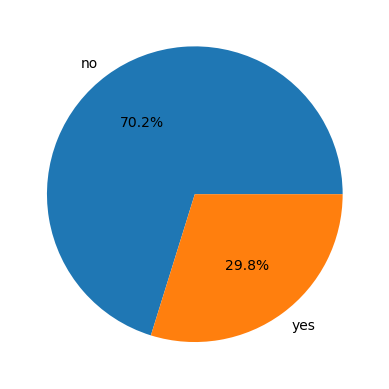

In [24]:
classes_count = df["Loan_Approved"].value_counts()
plt.pie(classes_count,labels = ["no" , "yes"],autopct = "%1.1f%%")


[Text(0, 0, '252'),
 Text(0, 0, '199'),
 Text(0, 0, '190'),
 Text(0, 0, '181'),
 Text(0, 0, '178')]

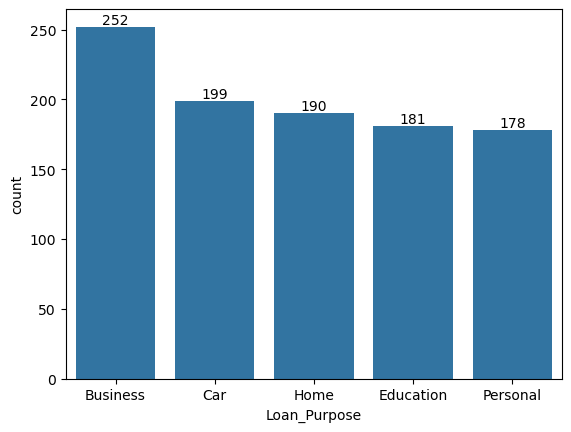

In [32]:
edu_count = df["Loan_Purpose"].value_counts()
ax = sns.barplot(edu_count)
ax.bar_label(ax.containers[0])

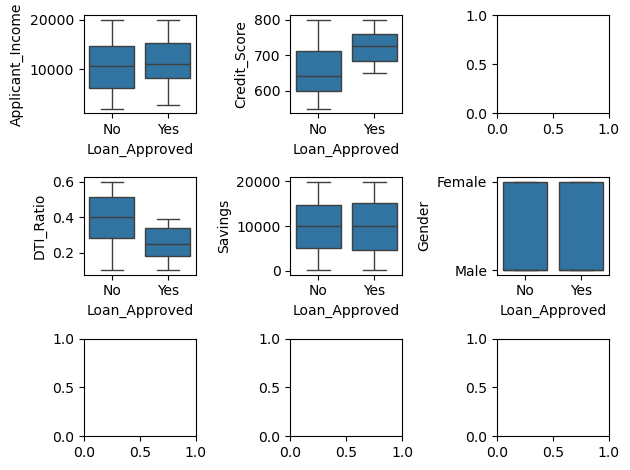

In [37]:
fig, axes = plt.subplots(3, 3)

sns.boxplot(ax=axes[0, 0], data=df, x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[0, 1], data=df, x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[1, 0], data=df, x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1, 1], data=df, x="Loan_Approved",y="Savings")
sns.boxplot(ax=axes[1, 2], data=df, x="Loan_Approved",y="Gender")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

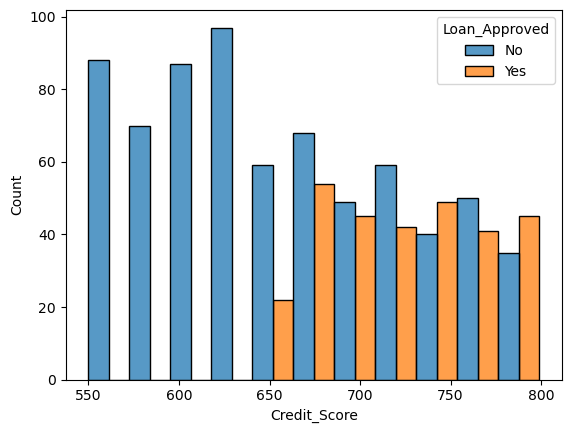

In [39]:
sns.histplot(

    data = df,
    x = "Credit_Score",
    hue = "Loan_Approved",
    multiple = "dodge"
    
)

In [47]:
df = df.drop("Applicant_ID",axis=1)

In [48]:
df.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age',
       'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans',
       'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender',
       'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])

cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]
oho = OneHotEncoder(drop = "first" , sparse_output=False, handle_unknown="ignore")
encoded = oho.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=oho.get_feature_names_out(cols), index=df.index)
df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [61]:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr();
num_cols.corr()["Loan_Approved"]

Applicant_Income                   0.119796
Coapplicant_Income                 0.004230
Age                               -0.022343
Dependents                        -0.023811
Credit_Score                       0.451175
Existing_Loans                    -0.034794
DTI_Ratio                         -0.444783
Savings                           -0.013437
Collateral_Value                   0.021868
Loan_Amount                       -0.126499
Loan_Term                         -0.086644
Education_Level                   -0.052920
Loan_Approved                      1.000000
Employment_Status_Salaried        -0.041428
Employment_Status_Self-employed   -0.001337
Employment_Status_Unemployed      -0.044464
Marital_Status_Single              0.030182
Loan_Purpose_Car                  -0.056416
Loan_Purpose_Education            -0.016684
Loan_Purpose_Home                  0.002118
Loan_Purpose_Personal              0.034043
Property_Area_Semiurban           -0.012967
Property_Area_Urban             

<Axes: >

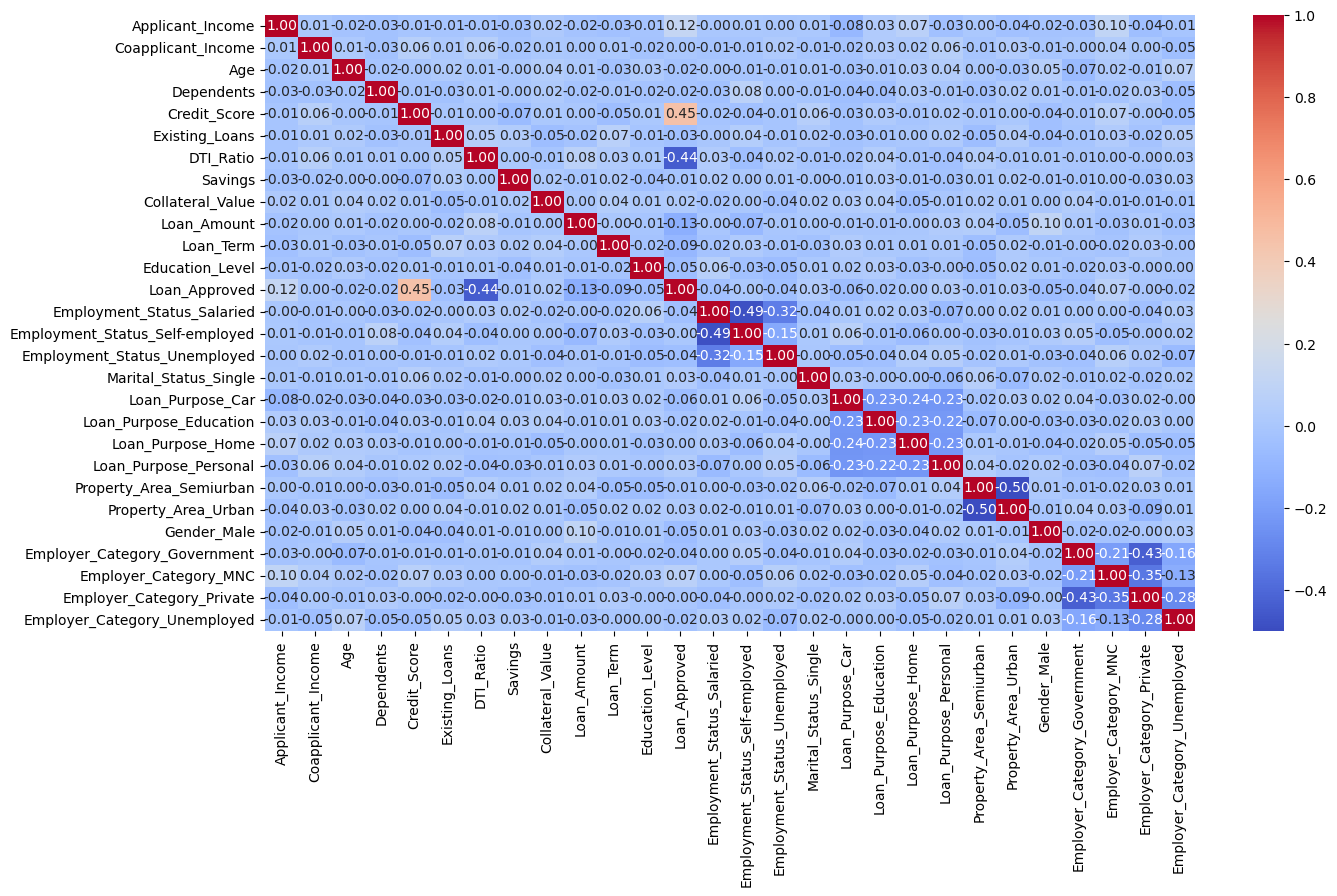

In [65]:
plt.figure(figsize = (15,8))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm"  
)

In [66]:
X = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)

y_pred = log_model.predict(X_test_scaled)
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))


Logistic Regression Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]


In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5 )
knn_model.fit(X_train_scaled,y_train)

y_pred = knn_model.predict(X_test_scaled)
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))


Logistic Regression Model
Precision:  0.6274509803921569
Recall:  0.5245901639344263
F1 score:  0.5714285714285714
Accuracy:  0.76
CM:  [[120  19]
 [ 29  32]]


In [75]:
from sklearn.naive_bayes import GaussianNB
go_model = GaussianNB()
go_model.fit(X_train_scaled,y_train)

y_pred = go_model.predict(X_test_scaled)
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))


Logistic Regression Model
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1 score:  0.7692307692307693
Accuracy:  0.865
CM:  [[128  11]
 [ 16  45]]


In [77]:
df["DTI_Ratio_sq"] = df["DTI_Ratio"]**2
df["Credit_Score_sq"] = df["Credit_Score"] **2

X = df.drop(columns = ["DTI_Ratio","Credit_Score"])
y = df["Loan_Approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  1.0
Recall:  1.0
F1 score:  1.0
Accuracy:  1.0
CM:  [[139   0]
 [  0  61]]


In [79]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.9824561403508771
Recall:  0.9180327868852459
F1 score:  0.9491525423728814
Accuracy:  0.97
CM:  [[138   1]
 [  5  56]]


In [80]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  1.0
Recall:  1.0
F1 score:  1.0
Accuracy:  1.0
CM:  [[139   0]
 [  0  61]]
